In [48]:
import pandas as pd 
import numpy as np 
import subprocess
import matplotlib.pyplot as plt 
from IPython.display import SVG

In [27]:
# results = open("../otherScripts/hpsweep/sweepResults.txt","r")
# lines = results.readlines()
# for (i,line) in enumerate(lines):
#     if i != 0: 
#         lines[i] = line.replace("_s","")
# newResults = open("../otherScripts/hpsweep/sweepResults.txt","w")
# newResults.writelines(lines)
# newResults.close()




In [50]:
results = pd.read_csv("../otherScripts/hpsweep/sweepResults.txt")


In [54]:
pd.set_option('display.max_rows', None)
results.sort_values('R_w')[::-1][:100]


,t_sr,t_stdp,t_stdp_minus,a_stdp,f,k,fr,R_w,R_nw,SNR_w,SNR_nw
614,4.0,0.10,0.10,-0.8,0.5,1.0,50,0.91888,0.83473,8.83347,7.97024
619,4.0,0.05,0.10,-0.4,0.5,1.0,50,0.90426,0.77990,8.50732,7.44096
714,4.0,0.02,0.02,-0.6,0.5,1.0,50,0.90135,0.69761,8.55893,7.28686
697,4.0,0.03,0.03,-0.6,0.5,1.0,50,0.89793,0.70839,8.35295,7.55247
672,4.0,0.03,0.05,-0.4,0.5,1.0,50,0.89362,0.71357,8.67809,8.32753
593,4.0,0.05,0.05,-0.8,0.5,1.0,50,0.89117,0.74940,7.40214,6.25578
551,4.0,0.05,0.03,-1.0,0.5,1.0,50,0.89031,0.73064,9.28941,8.40485
728,4.0,0.02,0.03,-0.4,0.5,1.0,50,0.88891,0.68949,8.15859,8.37159
693,4.0,0.03,0.02,-1.0,0.5,1.0,50,0.88367,0.70965,6.69689,7.33038
595,4.0,0.03,0.10,-0.2,0.5,1.0,50,0.88238,0.72333,8.58639,8.61810


In [11]:
results.iloc[1305]


t_sr                8.0_s
t_stdp             0.02_s
t_stdp_asymm        1.0_s
a_stdp_asymm       -0.6_s
f                   0.8_s
k                   0.5_s
fr                    1_s
R_w             0.03037_s
R_nw            0.03054_s
SNR_w           1.69279_s
SNR_nw            1.79183
Name: 1305, dtype: object

In [4]:
sortedResults = results.sort_values('area')
for i in range(20):
    kappa = int(1000*sortedResults['kappa'].iloc[i])
    tau_sr = int(1000*sortedResults['tau_sr'].iloc[i])
    tau_stdp = int(1000*sortedResults['tau_stdp'].iloc[i])
    asymm = int(1000*sortedResults['asymm'].iloc[i])
    frac = int(1000*sortedResults['frac'].iloc[i])
    figpath = "../figures/clusterSweep/%g_%g_%g_%g_%g.svg" %(kappa,tau_sr,tau_stdp,asymm,frac)
    print(figpath)
    !cp $figpath ../figures/clusterSweep/top10
    newfigpath =   "../figures/clusterSweep/top10/%g_%g_%g_%g_%g.svg" %(kappa,tau_sr,tau_stdp,asymm,frac)
    newerfigpath = "../figures/clusterSweep/top10/%g_%g_%g_%g_%g_%g.svg" %(i+1,kappa,tau_sr,tau_stdp,asymm,frac)
    # !mv $newfigpath newerfigpath

KeyError: 'area'

In [16]:
sortedResults = results.sort_values('area')
for i in range(20):
    kappa = int(1000*sortedResults['kappa'].iloc[-i])
    tau_sr = int(1000*sortedResults['tau_sr'].iloc[-i])
    tau_stdp = int(1000*sortedResults['tau_stdp'].iloc[-i])
    asymm = int(1000*sortedResults['asymm'].iloc[-i])
    frac = int(1000*sortedResults['frac'].iloc[-i])
    figpath = "../figures/clusterSweep/%g_%g_%g_%g_%g.svg" %(kappa,tau_sr,tau_stdp,asymm,frac)
    print(figpath)
    !cp $figpath ../figures/clusterSweep/bottom10
    newfigpath =   "../figures/clusterSweep/bottom10/%g_%g_%g_%g_%g.svg" %(kappa,tau_sr,tau_stdp,asymm,frac)
    newerfigpath = "../figures/clusterSweep/bottom10/%g_%g_%g_%g_%g_%g.svg" %(i+1,kappa,tau_sr,tau_stdp,asymm,frac)
    # !mv $newfigpath newerfigpath

../figures/clusterSweep/50_5000_30_980_600.svg
../figures/clusterSweep/1000_5000_25_980_800.svg
../figures/clusterSweep/1000_5000_30_980_800.svg
../figures/clusterSweep/1000_4000_30_980_800.svg
../figures/clusterSweep/1000_4000_25_980_700.svg
../figures/clusterSweep/1000_5000_25_980_700.svg
../figures/clusterSweep/1000_5000_30_980_700.svg
../figures/clusterSweep/1000_5000_25_980_600.svg
../figures/clusterSweep/1000_4000_30_980_600.svg
../figures/clusterSweep/1000_5000_30_980_600.svg
../figures/clusterSweep/1000_4000_25_950_800.svg
../figures/clusterSweep/1000_5000_25_950_800.svg
../figures/clusterSweep/1000_5000_30_950_800.svg
../figures/clusterSweep/1000_4000_30_950_800.svg
../figures/clusterSweep/1000_5000_25_950_700.svg
../figures/clusterSweep/1000_4000_25_950_700.svg
../figures/clusterSweep/1000_5000_30_950_700.svg
../figures/clusterSweep/500_5000_25_980_800.svg
../figures/clusterSweep/1000_4000_30_950_700.svg
../figures/clusterSweep/500_4000_30_980_800.svg


(array([152., 149., 163., 178., 158., 170., 157., 129., 137., 148., 122.,
        118.,  90., 109.,  83.,  82.,  57.,  77.,  73.,  70.,  76.,  83.,
         82.,  55.,  65.,  76.,  60.,  56.,  59.,  54.,  43.,  50.,  49.,
         43.,  43.,  46.,  48.,  61.,  29.,  50.,  47.,  53.,  30.,  38.,
         36.,  37.,  33.,  26.,  30.,  32.,  19.,  22.,  20.,  17.,  12.,
         15.,   9.,   7.,   8.,  14.,  14.,   8.,   7.,   6.,   9.,  11.,
          7.,  10.,   5.,   7.,   5.,   7.,   8.,  11.,   9.,   9.,  10.,
         12.,  11.,   7.,  12.,   6.,  15.,   7.,  10.,   9.,  10.,   9.,
          9.,   3.,   6.,   8.,   9.,   7.,   4.,   6.,   5.,   2.,   3.,
          1.]),
 array([3.000000e-05, 8.708700e-03, 1.738740e-02, 2.606610e-02,
        3.474480e-02, 4.342350e-02, 5.210220e-02, 6.078090e-02,
        6.945960e-02, 7.813830e-02, 8.681700e-02, 9.549570e-02,
        1.041744e-01, 1.128531e-01, 1.215318e-01, 1.302105e-01,
        1.388892e-01, 1.475679e-01, 1.562466e-01, 1.649253e-01

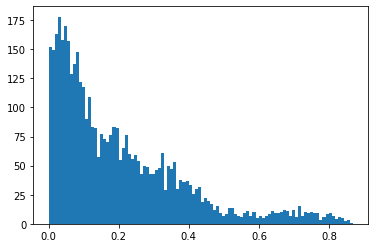

In [32]:
plt.hist(results['R_w'],bins=100)

In [9]:
#Global best params 
id_R2 = results['R2'].argsort()[::-1][0]
id_skill = results['skill'].argsort()[::-1][0]
id_area = results['area'].argsort()[0]
id_L2 = results['L2'].argsort()[0]

print("            kappa             tau_stdp      tau_sr          asymm             frac")
print("R2:         %.2f              %.2f          %.2f            %.2f              %.2f" %(results['kappa'][id_R2].mean(),results['tau_stdp'][id_R2].mean(),results['tau_sr'][id_R2].mean(),results['asymm'][id_R2].mean(),results['frac'][id_R2].mean()))
print("skill:      %.2f              %.2f          %.2f            %.2f              %.2f" %(results['kappa'][id_skill].mean(),results['tau_stdp'][id_skill].mean(),results['tau_sr'][id_skill].mean(),results['asymm'][id_skill].mean(),results['frac'][id_skill].mean()))
print("area:       %.2f              %.2f          %.2f            %.2f              %.2f" %(results['kappa'][id_area].mean(),results['tau_stdp'][id_area].mean(),results['tau_sr'][id_area].mean(),results['asymm'][id_area].mean(),results['frac'][id_area].mean()))
print("L2:         %.2f              %.2f          %.2f            %.2f              %.2f" %(results['kappa'][id_L2].mean(),results['tau_stdp'][id_L2].mean(),results['tau_sr'][id_L2].mean(),results['asymm'][id_L2].mean(),results['frac'][id_L2].mean()))


#And for each tau_sr

            kappa             tau_stdp      tau_sr          asymm             frac
R2:         2.00              0.02          2.00            0.90              0.80
skill:      2.00              0.02          4.00            0.90              0.80
area:       0.50              0.03          4.00            0.90              0.60
L2:         0.50              0.03          4.00            0.90              0.60


In [10]:
top = 5

id_R2 = results['R2'].argsort()[::-1][:top]
id_skill = results['skill'].argsort()[::-1][:top]
id_area = results['area'].argsort()[:top]
id_L2 = results['L2'].argsort()[:top]

print("            kappa             tau_stdp          asymm             frac")
print("R2:         %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_R2].mean(),results['kappa'][id_R2].std(),results['tau_stdp'][id_R2].mean(),results['tau_stdp'][id_R2].std(),results['asymm'][id_R2].mean(),results['asymm'][id_R2].std(),results['frac'][id_R2].mean(),results['frac'][id_R2].std()))
print("skill:      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_skill].mean(),results['kappa'][id_skill].std(),results['tau_stdp'][id_skill].mean(),results['tau_stdp'][id_skill].std(),results['asymm'][id_skill].mean(),results['asymm'][id_skill].std(),results['frac'][id_skill].mean(),results['frac'][id_skill].std()))
print("area:       %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_area].mean(),results['kappa'][id_area].std(),results['tau_stdp'][id_area].mean(),results['tau_stdp'][id_area].std(),results['asymm'][id_area].mean(),results['asymm'][id_area].std(),results['frac'][id_area].mean(),results['frac'][id_area].std()))
print("L2:         %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_L2].mean(),results['kappa'][id_L2].std(),results['tau_stdp'][id_L2].mean(),results['tau_stdp'][id_L2].std(),results['asymm'][id_L2].mean(),results['asymm'][id_L2].std(),results['frac'][id_L2].mean(),results['frac'][id_L2].std()))


            kappa             tau_stdp          asymm             frac
R2:         0.50 +- 0.00      0.03 +- 0.00      0.90 +- 0.00      0.60 +- 0.00
skill:      0.50 +- 0.00      0.03 +- 0.00      0.90 +- 0.00      0.62 +- 0.04
area:       0.60 +- 0.22      0.03 +- 0.00      0.88 +- 0.04      0.62 +- 0.04
L2:         0.50 +- 0.00      0.03 +- 0.00      0.90 +- 0.00      0.62 +- 0.04


In [32]:
results['frac'][id_R2].mean()

0.6799999999999999

2.1994663604509137 1.6133144808371


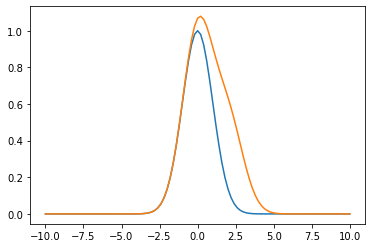

In [136]:
x = np.linspace(-10,10,101)
y = np.exp(-(x)**2/(2*1**2))
y1 = y + 0.5*np.exp(-(x-2)**2/(2*1**2))
fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot(x,y1)
from scipy.stats import skew
print(skew(y), skew(y1))